In [64]:
# usual imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline

In [65]:
# read in the data
data = pd.read_csv("KaggleV2-May-2016.csv", parse_dates=["AppointmentDay", "ScheduledDay"])

### Initial data cleaning 

In [66]:
# we see we have no missing values Nan's
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


In [67]:
# we see that in age we have a negative one. We will filter that out first. 
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [68]:
# filter out negative age
data = data[data.Age >=0]

In [69]:
# This turns the No-show variable into a binary of true or false where true means a no-show.  
data['no_show_bi'] = data["No-show"]== 'Yes'

In [70]:
# Create a column that is the day of the week of the appointment 
data["appointment_day"] = data["AppointmentDay"].dt.weekday_name

In [71]:
# Wednesday is the most common day of the week for an appointment, and Saturday is the least common. 
data["appointment_day"].value_counts()

Wednesday    25867
Tuesday      25640
Monday       22714
Friday       19019
Thursday     17247
Saturday        39
Name: appointment_day, dtype: int64

In [72]:
# Remove the Saturday appointments as they are clearly outliers. 
data= data[data["appointment_day"] != "Saturday"]

In [73]:
data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'no_show_bi', 'appointment_day'],
      dtype='object')

In [74]:
# create a column for the time between when a patient scheduled the appointment to the appointment.
data["wait"] = (data["AppointmentDay"].dt.date - data["ScheduledDay"].dt.date)

In [75]:
# we see there are 5 appointments that seem to have a negative wait time. we will drop these next. 
data[data['wait'] < "0 days"]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,no_show_bi,appointment_day,wait
27033,7.839273e+12,5679978,M,2016-05-10 10:51:53,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,True,Monday,-1 days
55226,7.896294e+12,5715660,F,2016-05-18 14:50:41,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,True,Tuesday,-1 days
64175,2.425226e+13,5664962,F,2016-05-05 13:43:58,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,True,Wednesday,-1 days
71533,9.982316e+14,5686628,F,2016-05-11 13:49:20,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,True,Thursday,-6 days
72362,3.787482e+12,5655637,M,2016-05-04 06:50:57,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,True,Tuesday,-1 days


In [76]:
# drop negative wait time rows. 
data = data[data['wait'] >= "0 days"]

In [77]:
# We see that a few neighbourhoods have very few appointments. 
# Neighboourhoods with less than 50 appointmnets are to be viewed as outliers. 
data.Neighbourhood.value_counts().tail(10)

UNIVERSITÁRIO                  152
SEGURANÇA DO LAR               145
NAZARETH                       135
MORADA DE CAMBURI               96
PONTAL DE CAMBURI               69
ILHA DO BOI                     35
ILHA DO FRADE                   10
AEROPORTO                        8
ILHAS OCEÂNICAS DE TRINDADE      2
PARQUE INDUSTRIAL                1
Name: Neighbourhood, dtype: int64

In [78]:
# remove outlier neighbourhoods
remove_list = ["ILHA DO BOI", "ILHA DO FRADE", "AEROPORTO", "ILHAS OCEÂNICAS DE TRINDADE","PARQUE INDUSTRIAL"]
data= data[~data.Neighbourhood.isin(remove_list)]

## Some interesting observations

In [79]:
# Given the short time frame 2016-04-30 until 2016-06-08, we see some patients have many appointments.
data.PatientId.value_counts().head(10)

8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
3.353478e+13    65
8.713749e+14    62
2.584244e+11    62
7.579746e+13    62
6.264199e+12    62
6.684488e+13    57
8.722785e+11    55
Name: PatientId, dtype: int64

In [80]:
# As expected as the number of appointments in the range goes up the number of patients goes down. 
data.PatientId.value_counts().to_frame().PatientId.value_counts()

1     37882
2     13884
3      5495
4      2365
5      1117
6       552
7       308
8       200
9       104
10       85
11       63
12       36
13       35
14       22
15       15
17       10
16       10
20        8
18        8
19        6
62        4
21        3
23        2
30        2
46        2
38        2
42        2
34        2
57        1
35        1
65        1
29        1
24        1
33        1
88        1
51        1
37        1
55        1
70        1
54        1
22        1
84        1
50        1
40        1
Name: PatientId, dtype: int64

In [81]:
#  Appointment ID is a unique value per line. 
data.AppointmentID.value_counts().head(3)

5769215    1
5539130    1
5549375    1
Name: AppointmentID, dtype: int64

In [82]:
data.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,no_show_bi,appointment_day,wait
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,False,Friday,0 days
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,False,Friday,0 days
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,False,Friday,0 days
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,False,Friday,0 days
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,False,Friday,0 days


### While we have the time the appointment was scheduled we do not have the time of the appointment. 
### This seems to be less useful but perhaps it is this way for patient privacy. 

In [83]:
# The no-show rate is the mean of the no_show_bi column. This will be used to compare the different features
# and how they relate to the no shows rate. 
data.no_show_bi.mean()

0.20191802655171789

In [84]:
# The day of the week that the appointment happens slightly affects the no-show rate. 
data.groupby('appointment_day').mean()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show_bi
appointment_day,,,,,,,,,,
Friday,1.489358e+14,5.661033e+06,37.044208,0.099047,0.197358,0.076996,0.031998,0.023367,0.221409,0.212252
Monday,1.487861e+14,5.671181e+06,36.823351,0.097772,0.193341,0.069189,0.031005,0.021008,0.314542,0.206509
Thursday,1.448039e+14,5.671427e+06,37.226600,0.096211,0.201184,0.069750,0.030059,0.023734,0.281147,0.193582
Tuesday,1.479651e+14,5.681338e+06,37.260827,0.099922,0.200156,0.073156,0.028794,0.022825,0.406009,0.200897
Wednesday,1.464461e+14,5.686001e+06,37.049428,0.098120,0.194887,0.070467,0.030554,0.020924,0.342474,0.196860


In [85]:
# Wednesday and Thursday have a smaller no show rate while Monday and Friday have a higher no show rate. 

In [86]:
data.shape

(110426, 17)

In [87]:
# Comparing gender, females have a slightly higher rate of no show but this seems an insignificant difference. 
data.groupby('Gender').mean()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show_bi
Gender,,,,,,,,,,
F,1.459830e+14,5.674339e+06,38.884968,0.123293,0.213458,0.078016,0.017024,0.019546,0.336932,0.203093
M,1.501803e+14,5.677087e+06,33.723956,0.051959,0.167003,0.060368,0.055271,0.027247,0.291621,0.199736


In [88]:
# Only about 2% of patients have any handicap. we do see a positive corelation # of handicaps to 
data.Handcap.value_counts()

0    108188
1      2039
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [89]:
# We do see a positive corelation # of handicaps to percentage of no-shows. 
data.groupby('Handcap').mean()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,no_show_bi
Handcap,,,,,,,,,
0,1.477669e+14,5.675145e+06,36.799673,0.098717,0.192332,0.069638,0.030318,0.322771,0.202351
1,1.324164e+14,5.683180e+06,50.886709,0.078470,0.433055,0.174595,0.034331,0.239333,0.178519
2,1.235427e+14,5.678123e+06,47.775956,0.098361,0.459016,0.234973,0.027322,0.234973,0.202186
3,1.576761e+14,5.674417e+06,48.615385,0.000000,0.076923,0.000000,0.230769,0.230769,0.230769
4,4.215626e+14,5.749102e+06,14.333333,0.000000,0.000000,0.000000,0.000000,0.333333,0.333333


In [90]:
# alcoholism does not seem to affect the no-show rate. This does seem surprising. 
data.groupby('Alcoholism').mean()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Handcap,SMS_received,no_show_bi
Alcoholism,,,,,,,,,
0,1.469488e+14,5.674884e+06,36.686227,0.096481,0.191000,0.070992,0.022107,0.323234,0.201928
1,1.634936e+14,5.688573e+06,49.594401,0.157236,0.394878,0.098868,0.026504,0.252233,0.201608


In [91]:
data.groupby('Hipertension').count()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Diabetes,Alcoholism,Handcap,SMS_received,No-show,no_show_bi,appointment_day,wait
Hipertension,,,,,,,,,,,,,,,,
0,88650,88650,88650,88650,88650,88650,88650,88650,88650,88650,88650,88650,88650,88650,88650,88650
1,21776,21776,21776,21776,21776,21776,21776,21776,21776,21776,21776,21776,21776,21776,21776,21776


In [92]:
# Hipertension does seem to correlate with the no show rate, but those with Hipertension were more likely to show up. 
data.groupby('Hipertension').mean()

,PatientId,AppointmentID,Age,Scholarship,Diabetes,Alcoholism,Handcap,SMS_received,no_show_bi
Hipertension,,,,,,,,,
0,1.482581e+14,5.674849e+06,31.298229,0.101230,0.016413,0.022922,0.015815,0.322504,0.209013
1,1.441702e+14,5.677138e+06,60.611269,0.086517,0.297483,0.060893,0.048402,0.315255,0.173035


In [93]:
data.groupby('Diabetes').mean()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Alcoholism,Handcap,SMS_received,no_show_bi
Diabetes,,,,,,,,,
0,1.473281e+14,5.674850e+06,35.199009,0.100387,0.149259,0.029524,0.019650,0.322978,0.203614
1,1.490513e+14,5.681118e+06,61.364805,0.071726,0.816589,0.041850,0.055717,0.296483,0.180008


In [94]:
data.groupby('Scholarship').count()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,no_show_bi,appointment_day,wait
Scholarship,,,,,,,,,,,,,,,,
0,99568,99568,99568,99568,99568,99568,99568,99568,99568,99568,99568,99568,99568,99568,99568,99568
1,10858,10858,10858,10858,10858,10858,10858,10858,10858,10858,10858,10858,10858,10858,10858,10858


In [95]:
# Being on scholarship, does seem to correlate with a higher no-show rate. 
data.groupby('Scholarship').mean()

,PatientId,AppointmentID,Age,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show_bi
Scholarship,,,,,,,,,
0,1.476880e+14,5.674768e+06,37.783655,0.199783,0.073960,0.028423,0.022698,0.320896,0.198046
1,1.452876e+14,5.680187e+06,30.614846,0.173513,0.052404,0.048628,0.018051,0.322711,0.237429


In [96]:
# We can see from the below that there are many neighbourhoods and the no-show rate fluctuates significatly. 
data.groupby('Neighbourhood').mean()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show_bi
Neighbourhood,,,,,,,,,,
ANDORINHAS,1.495863e+14,5.677587e+06,36.106101,0.142794,0.259063,0.132184,0.022989,0.040230,0.250663,0.230327
ANTÔNIO HONÓRIO,1.361996e+14,5.668357e+06,36.845018,0.051661,0.018450,0.011070,0.000000,0.003690,0.343173,0.184502
ARIOVALDO FAVALESSA,1.536246e+14,5.685954e+06,32.480144,0.187726,0.122744,0.068592,0.050542,0.036101,0.202166,0.223827
BARRO VERMELHO,1.423487e+14,5.686655e+06,45.040189,0.000000,0.134752,0.054374,0.004728,0.014184,0.338061,0.215130
BELA VISTA,1.525532e+14,5.688532e+06,34.969061,0.117986,0.277923,0.086523,0.049816,0.044048,0.302569,0.201363
BENTO FERREIRA,1.320765e+14,5.681297e+06,44.613054,0.026807,0.231935,0.086247,0.009324,0.026807,0.376457,0.224942
BOA VISTA,1.685577e+14,5.696338e+06,31.243590,0.073718,0.118590,0.048077,0.019231,0.000000,0.400641,0.185897
BONFIM,1.409473e+14,5.683199e+06,35.179228,0.134511,0.258565,0.071403,0.059863,0.017310,0.280923,0.198341
CARATOÍRA,1.504468e+14,5.679903e+06,36.821696,0.178698,0.244576,0.074951,0.033925,0.022485,0.205917,0.229980


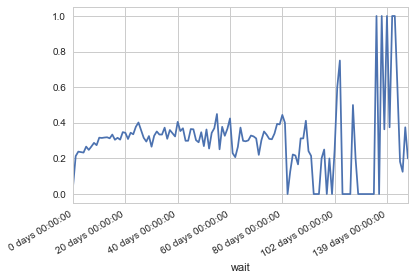

In [97]:
# from this plot we can see that in general the no show rate increases from 0-20 days of waiting. 
# after this time the exact number fluctuates but on average is constant. 
data.groupby('wait').mean().no_show_bi.plot()

In [98]:
# we clearly see that no-shows for same day appointments is very low. 
# in general the no show rate increase from 0-30 days, the longer out you schedule the more likely you are to miss it.
# we seem some exceptions to this rule as we get out into very long waits where patients did not miss their appoitments. 
# Binning will be needed to make use of this variable in further analysis. 
data.groupby('wait').mean()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show_bi
wait,,,,,,,,,,
0 days,1.516024e+14,5.713121e+06,34.445999,0.108678,0.175550,0.066561,0.039911,0.026365,0.000000,0.046476
1 days,1.410914e+14,5.705274e+06,39.927968,0.076258,0.246831,0.100653,0.029005,0.025355,0.000000,0.213216
2 days,1.404700e+14,5.700957e+06,45.539803,0.076923,0.286374,0.114043,0.026237,0.029964,0.000000,0.238223
3 days,1.433350e+14,5.692252e+06,39.945441,0.099597,0.251190,0.095569,0.031124,0.027096,0.331380,0.235445
4 days,1.354941e+14,5.694100e+06,44.070023,0.084027,0.279334,0.105223,0.029523,0.022332,0.577025,0.232967
5 days,1.483555e+14,5.702080e+06,40.930360,0.091631,0.239462,0.086133,0.032987,0.028711,0.626451,0.266341
6 days,1.510063e+14,5.699662e+06,40.602974,0.098389,0.238910,0.088228,0.031970,0.022305,0.664932,0.248079
7 days,1.477823e+14,5.682030e+06,33.802938,0.106079,0.170747,0.060180,0.029172,0.014076,0.580987,0.267034
8 days,1.386670e+14,5.678607e+06,36.338481,0.109395,0.209781,0.072072,0.024453,0.020592,0.617332,0.287430


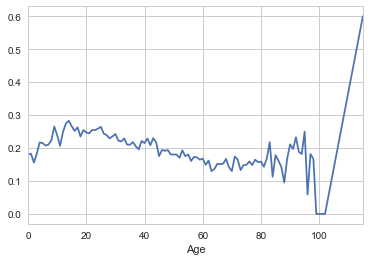

In [99]:
# We can see that the no show rate increases from zero to around 20 years of age and then slowly decreases as people get older. 
# the end of the plot gets erratic as age gets above 80 since there are so few people here averaging does not work. 
data.groupby('Age').mean().no_show_bi.plot()

In [100]:
data.groupby('Age').mean()

,PatientId,AppointmentID,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show_bi
Age,,,,,,,,,
0,1.539027e+14,5.671375e+06,0.014693,0.000000,0.000000,0.000000,0.000283,0.253461,0.180559
1,1.580224e+14,5.678714e+06,0.036076,0.000000,0.000440,0.000000,0.000440,0.249010,0.182578
2,1.437773e+14,5.681502e+06,0.073548,0.000000,0.000618,0.000000,0.000618,0.242892,0.155748
3,1.447703e+14,5.678064e+06,0.089888,0.000000,0.000000,0.000000,0.000000,0.267019,0.183080
4,1.512473e+14,5.677033e+06,0.110855,0.000770,0.000770,0.000770,0.006928,0.293303,0.217090
5,1.404347e+14,5.674069e+06,0.166555,0.000000,0.000000,0.000672,0.002686,0.331766,0.214909
6,1.325496e+14,5.675511e+06,0.161736,0.000000,0.000000,0.000000,0.007232,0.335963,0.207758
7,1.593818e+14,5.674603e+06,0.134642,0.002805,0.002104,0.001403,0.009116,0.309257,0.210379
8,1.458912e+14,5.675102e+06,0.148876,0.000702,0.000000,0.000702,0.007725,0.329354,0.223315


## TIME SERIES PLOTS

In [101]:
data_over_time = data.set_index('AppointmentDay').resample('1D').mean()
data_over_time.head(3)

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show_bi
AppointmentDay,,,,,,,,,,
2016-04-29,1.464552e+14,5.594298e+06,35.678737,0.099041,0.190963,0.07459,0.031879,0.022903,0.393996,0.195605
2016-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
time= data_over_time.dropna()
time.head()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show_bi
AppointmentDay,,,,,,,,,,
2016-04-29,1.464552e+14,5.594298e+06,35.678737,0.099041,0.190963,0.074590,0.031879,0.022903,0.393996,0.195605
2016-05-02,1.452334e+14,5.611401e+06,36.828114,0.095086,0.207314,0.073600,0.031771,0.024457,0.521829,0.196800
2016-05-03,1.466362e+14,5.618681e+06,37.381848,0.110040,0.209029,0.074065,0.030096,0.026569,0.469316,0.195156
2016-05-04,1.395912e+14,5.623093e+06,36.661782,0.098487,0.202498,0.065578,0.028345,0.020658,0.394187,0.233245
2016-05-05,1.412098e+14,5.627614e+06,37.118529,0.104708,0.204498,0.071211,0.028344,0.022956,0.370344,0.188569


In [103]:
time.tail()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show_bi
AppointmentDay,,,,,,,,,,
2016-06-02,1.456539e+14,5.726281e+06,38.196147,0.092386,0.207985,0.074513,0.034587,0.022748,0.389044,0.186165
2016-06-03,1.496755e+14,5.727786e+06,38.477228,0.098678,0.213761,0.083986,0.034035,0.023017,0.384427,0.196866
2016-06-06,1.514224e+14,5.738021e+06,36.763326,0.097655,0.181023,0.065885,0.028145,0.021962,0.521109,0.186141
2016-06-07,1.462925e+14,5.745434e+06,36.827219,0.093071,0.198143,0.076993,0.027400,0.022645,0.482337,0.184783
2016-06-08,1.481956e+14,5.748822e+06,37.266860,0.102278,0.200983,0.070791,0.037517,0.019652,0.410451,0.172622


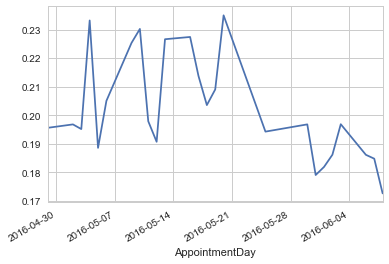

In [104]:
# the no-show rate seems to fluctuate over time, peaking on a few dates as well as one date range. After a certain period it 
# seems to decrease and then it continues to decrease lower than ever before... in this time period. 
time.no_show_bi.plot()

In [105]:
data_by_month = data.set_index('AppointmentDay').resample('1M').mean()
data_by_month

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show_bi
AppointmentDay,,,,,,,,,,
2016-04-30,1.464552e+14,5.594298e+06,35.678737,0.099041,0.190963,0.07459,0.031879,0.022903,0.393996,0.195605
2016-05-31,1.472624e+14,5.659144e+06,36.969079,0.098780,0.196718,0.07098,0.029856,0.022339,0.282521,0.207851
2016-06-30,1.481526e+14,5.734546e+06,37.584834,0.096861,0.199433,0.07413,0.031921,0.021861,0.429917,0.184569


In [106]:
data_by_week = data.set_index('AppointmentDay').resample('1W').mean()
data_by_week

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show_bi
AppointmentDay,,,,,,,,,,
2016-05-01,1.464552e+14,5.594298e+06,35.678737,0.099041,0.190963,0.074590,0.031879,0.022903,0.393996,0.195605
2016-05-08,1.445519e+14,5.622095e+06,37.095811,0.101161,0.204041,0.071596,0.030186,0.023212,0.423413,0.203563
2016-05-15,1.467278e+14,5.648530e+06,36.794555,0.097277,0.196954,0.072820,0.029488,0.022381,0.249423,0.213890
2016-05-22,1.495482e+14,5.673631e+06,36.648356,0.095034,0.188296,0.068781,0.030077,0.022383,0.000000,0.217487
2016-05-29,1.489997e+14,5.697923e+06,37.441678,0.100720,0.196259,0.071401,0.029445,0.022874,0.496777,0.198408
2016-06-05,1.477105e+14,5.715931e+06,37.930241,0.099326,0.203456,0.074332,0.031646,0.021205,0.442068,0.188118
2016-06-12,1.486910e+14,5.743992e+06,36.950088,0.097688,0.193168,0.071113,0.030992,0.021422,0.472026,0.181243


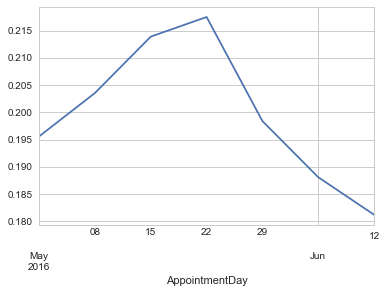

In [107]:
# averaging no-shows by week we do see an upward and then a downward trend. 
data_by_week.no_show_bi.plot()

In [108]:
# this is the percent of noshows per date 
time.no_show_bi

AppointmentDay
2016-04-29    0.195605
2016-05-02    0.196800
2016-05-03    0.195156
2016-05-04    0.233245
2016-05-05    0.188569
2016-05-06    0.205055
2016-05-09    0.225371
2016-05-10    0.230269
2016-05-11    0.197898
2016-05-12    0.190704
2016-05-13    0.226657
2016-05-16    0.227450
2016-05-17    0.213779
2016-05-18    0.203568
2016-05-19    0.209046
2016-05-20    0.235033
2016-05-24    0.202446
2016-05-25    0.194267
2016-05-30    0.196809
2016-05-31    0.179056
2016-06-01    0.181900
2016-06-02    0.186165
2016-06-03    0.196866
2016-06-06    0.186141
2016-06-07    0.184783
2016-06-08    0.172622
Name: no_show_bi, dtype: float64

In [109]:
apt_count_time = data.set_index('AppointmentDay').resample('1D').count()
apt_count_time.head()

,PatientId,AppointmentID,Gender,ScheduledDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,no_show_bi,appointment_day,wait
AppointmentDay,,,,,,,,,,,,,,,,
2016-04-29,3231,3231,3231,3231,3231,3231,3231,3231,3231,3231,3231,3231,3231,3231,3231,3231
2016-04-30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-05-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-05-02,4375,4375,4375,4375,4375,4375,4375,4375,4375,4375,4375,4375,4375,4375,4375,4375
2016-05-03,4253,4253,4253,4253,4253,4253,4253,4253,4253,4253,4253,4253,4253,4253,4253,4253


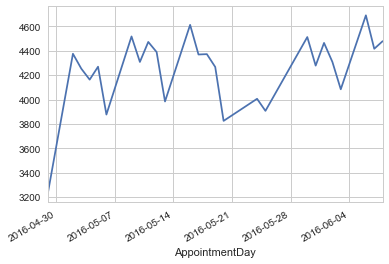

In [110]:
# we see the 
apt =apt_count_time.replace(0, np.nan)
apt = apt.dropna()
apt["PatientId"].plot()

In [111]:
# this shows the numerical amount of appointments on each day we have records for. 
apt.Gender

AppointmentDay
2016-04-29    3231.0
2016-05-02    4375.0
2016-05-03    4253.0
2016-05-04    4163.0
2016-05-05    4269.0
2016-05-06    3877.0
2016-05-09    4517.0
2016-05-10    4308.0
2016-05-11    4472.0
2016-05-12    4389.0
2016-05-13    3984.0
2016-05-16    4612.0
2016-05-17    4369.0
2016-05-18    4372.0
2016-05-19    4267.0
2016-05-20    3825.0
2016-05-24    4006.0
2016-05-25    3907.0
2016-05-30    4512.0
2016-05-31    4278.0
2016-06-01    4464.0
2016-06-02    4308.0
2016-06-03    4084.0
2016-06-06    4690.0
2016-06-07    4416.0
2016-06-08    4478.0
Name: Gender, dtype: float64

In [112]:
apt.head()

,PatientId,AppointmentID,Gender,ScheduledDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,no_show_bi,appointment_day,wait
AppointmentDay,,,,,,,,,,,,,,,,
2016-04-29,3231.0,3231.0,3231.0,3231.0,3231.0,3231.0,3231.0,3231.0,3231.0,3231.0,3231.0,3231.0,3231.0,3231.0,3231.0,3231.0
2016-05-02,4375.0,4375.0,4375.0,4375.0,4375.0,4375.0,4375.0,4375.0,4375.0,4375.0,4375.0,4375.0,4375.0,4375.0,4375.0,4375.0
2016-05-03,4253.0,4253.0,4253.0,4253.0,4253.0,4253.0,4253.0,4253.0,4253.0,4253.0,4253.0,4253.0,4253.0,4253.0,4253.0,4253.0
2016-05-04,4163.0,4163.0,4163.0,4163.0,4163.0,4163.0,4163.0,4163.0,4163.0,4163.0,4163.0,4163.0,4163.0,4163.0,4163.0,4163.0
2016-05-05,4269.0,4269.0,4269.0,4269.0,4269.0,4269.0,4269.0,4269.0,4269.0,4269.0,4269.0,4269.0,4269.0,4269.0,4269.0,4269.0


In [113]:
data[data['Age']==115]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,no_show_bi,appointment_day,wait
63912,3.196321e+13,5700278,F,2016-05-16 09:17:44,2016-05-19,115,ANDORINHAS,0,0,0,0,1,0,Yes,True,Thursday,3 days
63915,3.196321e+13,5700279,F,2016-05-16 09:17:44,2016-05-19,115,ANDORINHAS,0,0,0,0,1,0,Yes,True,Thursday,3 days
68127,3.196321e+13,5562812,F,2016-04-08 14:29:17,2016-05-16,115,ANDORINHAS,0,0,0,0,1,0,Yes,True,Monday,38 days
76284,3.196321e+13,5744037,F,2016-05-30 09:44:51,2016-05-30,115,ANDORINHAS,0,0,0,0,1,0,No,False,Monday,0 days
97666,7.482346e+14,5717451,F,2016-05-19 07:57:56,2016-06-03,115,SÃO JOSÉ,0,1,0,0,0,1,No,False,Friday,15 days


In [114]:
data.Age.describe()

count    110426.000000
mean         37.078759
std          23.111269
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [115]:
# age of -1 is probably a bad va
data.Age.value_counts()

0      3539
1      2273
52     1743
49     1652
53     1651
56     1632
38     1628
59     1621
2      1618
50     1613
57     1600
36     1578
51     1564
19     1544
39     1536
37     1530
54     1530
34     1524
6      1521
33     1519
30     1517
3      1513
17     1508
32     1505
5      1489
44     1486
18     1486
58     1463
46     1458
45     1453
       ... 
72      613
74      601
76      571
75      543
78      541
77      526
80      511
81      433
82      392
79      388
84      311
83      280
85      275
86      260
87      183
89      173
88      126
90      109
92       86
91       66
93       53
94       33
95       24
96       17
97       11
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64

In [116]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,no_show_bi,appointment_day,wait
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,False,Friday,0 days
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,False,Friday,0 days
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,False,Friday,0 days
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,False,Friday,0 days
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,False,Friday,0 days


percent received sms per day ... why did some receive sms. using some criteria?  Random... 

## Trying to groupby patient ID to get multi visit data 

In [117]:
# we have 62299 different patients 
len(data["PatientId"].unique())

62240

In [118]:
data["PatientId"].value_counts().tail(20)

9.579269e+13    1
3.575454e+13    1
7.864438e+13    1
5.578968e+13    1
5.933373e+11    1
2.978889e+11    1
3.559395e+13    1
1.741546e+12    1
6.955720e+12    1
1.676285e+12    1
3.196313e+10    1
5.832338e+10    1
8.753725e+13    1
3.997358e+11    1
3.549199e+11    1
1.192393e+13    1
3.224222e+11    1
7.548665e+12    1
5.743619e+13    1
2.724571e+11    1
Name: PatientId, dtype: int64

In [119]:
multi_visit = data.groupby("PatientId").count().reset_index()
multi_visit = multi_visit[["PatientId", "AppointmentID"]]
multi_visit.columns = ["PatientId", "Appointment_Count"]
multi_visit.tail()

,PatientId,Appointment_Count
62235,9.999320e+14,5
62236,9.999350e+14,1
62237,9.999465e+14,1
62238,9.999686e+14,1
62239,9.999816e+14,1


In [120]:
multi_visit.Appointment_Count.value_counts()

1     37882
2     13884
3      5495
4      2365
5      1117
6       552
7       308
8       200
9       104
10       85
11       63
12       36
13       35
14       22
15       15
17       10
16       10
20        8
18        8
19        6
62        4
21        3
23        2
30        2
46        2
38        2
42        2
34        2
57        1
35        1
65        1
29        1
24        1
33        1
88        1
51        1
37        1
55        1
70        1
54        1
22        1
84        1
50        1
40        1
Name: Appointment_Count, dtype: int64

In [121]:
data_merged = pd.merge(data, multi_visit, on='PatientId')
data_merged.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,no_show_bi,appointment_day,wait,Appointment_Count
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,False,Friday,0 days,2
1,2.987250e+13,5639907,F,2016-04-29 09:47:47,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,False,Friday,0 days,2
2,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,False,Friday,0 days,2
3,5.589978e+14,5642211,M,2016-04-29 15:20:47,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,False,Friday,0 days,2
4,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,False,Friday,0 days,2


In [122]:
data_merged[data_merged['Appointment_Count']>1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,no_show_bi,appointment_day,wait,Appointment_Count
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,False,Friday,0 days,2
1,2.987250e+13,5639907,F,2016-04-29 09:47:47,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,False,Friday,0 days,2
2,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,False,Friday,0 days,2
3,5.589978e+14,5642211,M,2016-04-29 15:20:47,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,False,Friday,0 days,2
4,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,False,Friday,0 days,2
5,4.262962e+12,5639936,F,2016-04-29 09:51:10,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,False,Friday,0 days,2
6,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,False,Friday,0 days,2
7,8.679512e+11,5612472,F,2016-04-25 08:19:19,2016-05-19,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes,True,Thursday,24 days,2
9,9.598513e+13,5626772,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,False,Friday,2 days,2
10,9.598513e+13,5732325,F,2016-05-24 11:19:51,2016-06-01,76,REPÚBLICA,0,1,0,0,0,0,No,False,Wednesday,8 days,2


In [123]:
data_merged[data_merged['Appointment_Count']==1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,no_show_bi,appointment_day,wait,Appointment_Count
8,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,False,Friday,0 days,1
11,7.336882e+14,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,True,Friday,2 days,1
14,5.639473e+13,5638447,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No,False,Friday,0 days,1
15,7.812456e+13,5629123,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No,False,Friday,2 days,1
16,7.345362e+14,5630213,F,2016-04-27 14:58:11,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,No,False,Friday,2 days,1
17,7.542951e+12,5620163,M,2016-04-26 08:44:12,2016-04-29,29,NOVA PALESTINA,0,0,0,0,0,1,Yes,True,Friday,3 days,1
18,5.666548e+14,5634718,F,2016-04-28 11:33:51,2016-04-29,22,NOVA PALESTINA,1,0,0,0,0,0,No,False,Friday,1 days,1
21,9.988472e+13,5633951,F,2016-04-28 10:06:24,2016-04-29,54,NOVA PALESTINA,0,0,0,0,0,0,No,False,Friday,1 days,1
22,9.994839e+10,5620206,F,2016-04-26 08:47:27,2016-04-29,15,NOVA PALESTINA,0,0,0,0,0,1,No,False,Friday,3 days,1
23,8.457439e+13,5633121,M,2016-04-28 08:51:47,2016-04-29,50,NOVA PALESTINA,0,0,0,0,0,0,No,False,Friday,1 days,1


In [124]:
data_merged.groupby("Appointment_Count").mean()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show_bi
Appointment_Count,,,,,,,,,,
1,1.475669e+14,5.668889e+06,36.770788,0.087324,0.197138,0.069400,0.022280,0.019138,0.335172,0.187794
2,1.456063e+14,5.673952e+06,36.276145,0.096946,0.194036,0.073178,0.025137,0.020095,0.325915,0.206857
3,1.465949e+14,5.676852e+06,36.323324,0.104277,0.194904,0.069700,0.026024,0.020018,0.323385,0.209402
4,1.517097e+14,5.678785e+06,36.676533,0.111205,0.192812,0.074841,0.026216,0.022833,0.321776,0.221036
5,1.467355e+14,5.679875e+06,37.903312,0.111907,0.200537,0.076097,0.034915,0.029543,0.331423,0.213250
6,1.496394e+14,5.682014e+06,36.728865,0.126812,0.195652,0.083333,0.025362,0.030797,0.293780,0.219203
7,1.599745e+14,5.685944e+06,36.687848,0.129870,0.198052,0.074675,0.048701,0.022727,0.322820,0.234694
8,1.273976e+14,5.685204e+06,40.805000,0.065000,0.240000,0.090000,0.035000,0.045000,0.286250,0.230000
9,1.167093e+14,5.687893e+06,44.521368,0.105769,0.182692,0.048077,0.086538,0.028846,0.314103,0.226496


In [125]:
data_merged.groupby("Appointment_Count").mean()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show_bi
Appointment_Count,,,,,,,,,,
1,1.475669e+14,5.668889e+06,36.770788,0.087324,0.197138,0.069400,0.022280,0.019138,0.335172,0.187794
2,1.456063e+14,5.673952e+06,36.276145,0.096946,0.194036,0.073178,0.025137,0.020095,0.325915,0.206857
3,1.465949e+14,5.676852e+06,36.323324,0.104277,0.194904,0.069700,0.026024,0.020018,0.323385,0.209402
4,1.517097e+14,5.678785e+06,36.676533,0.111205,0.192812,0.074841,0.026216,0.022833,0.321776,0.221036
5,1.467355e+14,5.679875e+06,37.903312,0.111907,0.200537,0.076097,0.034915,0.029543,0.331423,0.213250
6,1.496394e+14,5.682014e+06,36.728865,0.126812,0.195652,0.083333,0.025362,0.030797,0.293780,0.219203
7,1.599745e+14,5.685944e+06,36.687848,0.129870,0.198052,0.074675,0.048701,0.022727,0.322820,0.234694
8,1.273976e+14,5.685204e+06,40.805000,0.065000,0.240000,0.090000,0.035000,0.045000,0.286250,0.230000
9,1.167093e+14,5.687893e+06,44.521368,0.105769,0.182692,0.048077,0.086538,0.028846,0.314103,0.226496


In [126]:
data_merged.Appointment_Count.value_counts()

1     37882
2     27768
3     16485
4      9460
5      5585
6      3312
7      2156
8      1600
9       936
10      850
11      693
13      455
12      432
14      308
62      248
15      225
17      170
16      160
20      160
18      144
19      114
46       92
88       88
84       84
42       84
38       76
70       70
34       68
65       65
21       63
30       60
57       57
55       55
54       54
51       51
50       50
23       46
40       40
37       37
35       35
33       33
29       29
24       24
22       22
Name: Appointment_Count, dtype: int64